In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/데이터셋 초초안.CSV",encoding='euc-kr')
df

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,33333,174.44950
1700,1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,11133,172.29475
1701,1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,11222,174.68650
1702,1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,11311,174.82175


Flux90s','Oxid_time','N2_HMDS','pressure_HMDS','temp_HMDS','time_HMDS_bake','Energy_Exposure' - 7개 뻄

In [4]:
df.drop(['Unnamed: 0','Chamber','Flux90s','Oxid_time','N2_HMDS','pressure_HMDS','temp_HMDS','time_HMDS_bake','Energy_Exposure'] ,axis = 1, inplace = True)

In [5]:
df

,type,Temp_OXid,ppm,Pressure,thickness,resist_target,temp_HMDS_bake,spin1,spin2,spin3,...,Flux60s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Etching_rate
0,dry,1214.307948,26.69,0.203,713.132,1.46994,200.551,502.391,4017.144,4903.611,...,1.500000e+16,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,169.78300
1,dry,978.110792,30.86,0.217,714.295,0.86579,199.835,507.183,4072.913,4979.082,...,1.110000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,171.94875
2,dry,1176.019149,31.07,0.218,710.114,0.90483,202.118,501.286,4084.939,5031.989,...,1.040000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,167.25350
3,dry,933.442733,31.04,0.196,710.617,0.42197,194.668,503.396,4045.078,4969.316,...,8.890000e+15,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,169.45425
4,wet,1140.598752,31.37,0.215,711.632,1.70139,202.192,501.423,4010.176,5092.407,...,1.670000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,715.498,0.89644,204.429,504.429,4088.587,5110.734,...,1.050000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,174.44950
1700,wet,1268.105427,45.07,0.215,707.179,1.02384,204.266,504.266,4085.330,5106.662,...,6.910000e+15,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,172.29475
1701,wet,1279.160563,45.12,0.214,712.946,1.02634,203.401,503.401,4068.014,5085.017,...,9.320000e+15,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,174.68650
1702,wet,1272.804948,45.34,0.213,711.987,0.56833,203.670,503.670,4073.408,5091.760,...,1.180000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,174.82175


In [6]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [7]:
df_x_dummy = pd.get_dummies(df_x)

In [8]:
df_x_dummy

,Temp_OXid,ppm,Pressure,thickness,resist_target,temp_HMDS_bake,spin1,spin2,spin3,photoresist_bake,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Etching_rate,type_dry,type_wet
0,1214.307948,26.69,0.203,713.132,1.46994,200.551,502.391,4017.144,4903.611,5.020,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,169.78300,1,0
1,978.110792,30.86,0.217,714.295,0.86579,199.835,507.183,4072.913,4979.082,4.937,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,171.94875,1,0
2,1176.019149,31.07,0.218,710.114,0.90483,202.118,501.286,4084.939,5031.989,4.888,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,167.25350,1,0
3,933.442733,31.04,0.196,710.617,0.42197,194.668,503.396,4045.078,4969.316,4.933,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,169.45425,1,0
4,1140.598752,31.37,0.215,711.632,1.70139,202.192,501.423,4010.176,5092.407,5.050,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,172.43300,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1275.182502,45.10,0.214,715.498,0.89644,204.429,504.429,4088.587,5110.734,5.114,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,174.44950,0,1
1700,1268.105427,45.07,0.215,707.179,1.02384,204.266,504.266,4085.330,5106.662,5.083,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,172.29475,0,1
1701,1279.160563,45.12,0.214,712.946,1.02634,203.401,503.401,4068.014,5085.017,5.098,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,174.68650,0,1
1702,1272.804948,45.34,0.213,711.987,0.56833,203.670,503.670,4073.408,5091.760,5.107,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,174.82175,0,1


# DT

In [9]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 29)
train data Y size : (1192,)
test data X size : (512, 29)
test data Y size : (512,)


In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.930


In [11]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.930
1,2,0.945,0.939
2,3,0.950,0.943
3,4,0.956,0.949
4,5,0.962,0.949
5,6,0.975,0.932
6,7,0.984,0.945
7,8,0.989,0.949
8,9,0.993,0.945
9,10,0.996,0.930


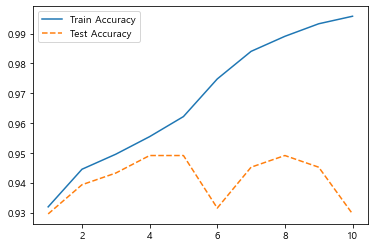

In [12]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [13]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.956,0.949
1,4,0.956,0.949
2,6,0.954,0.949
3,8,0.951,0.945
4,10,0.951,0.945
5,12,0.951,0.945
6,14,0.951,0.945
7,16,0.951,0.945
8,18,0.951,0.945
9,20,0.951,0.945


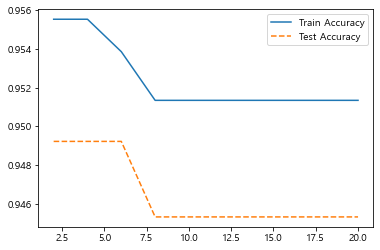

In [14]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [15]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 4, min_samples_split=6
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.953,0.947
1,4,0.950,0.945
2,6,0.949,0.939
3,8,0.949,0.941
4,10,0.949,0.943
5,12,0.949,0.943
6,14,0.948,0.943
7,16,0.947,0.941
8,18,0.945,0.939
9,20,0.945,0.939


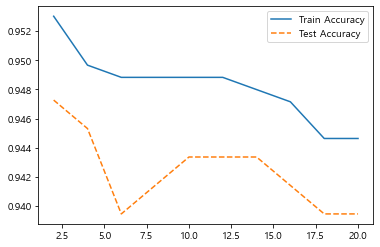

In [16]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

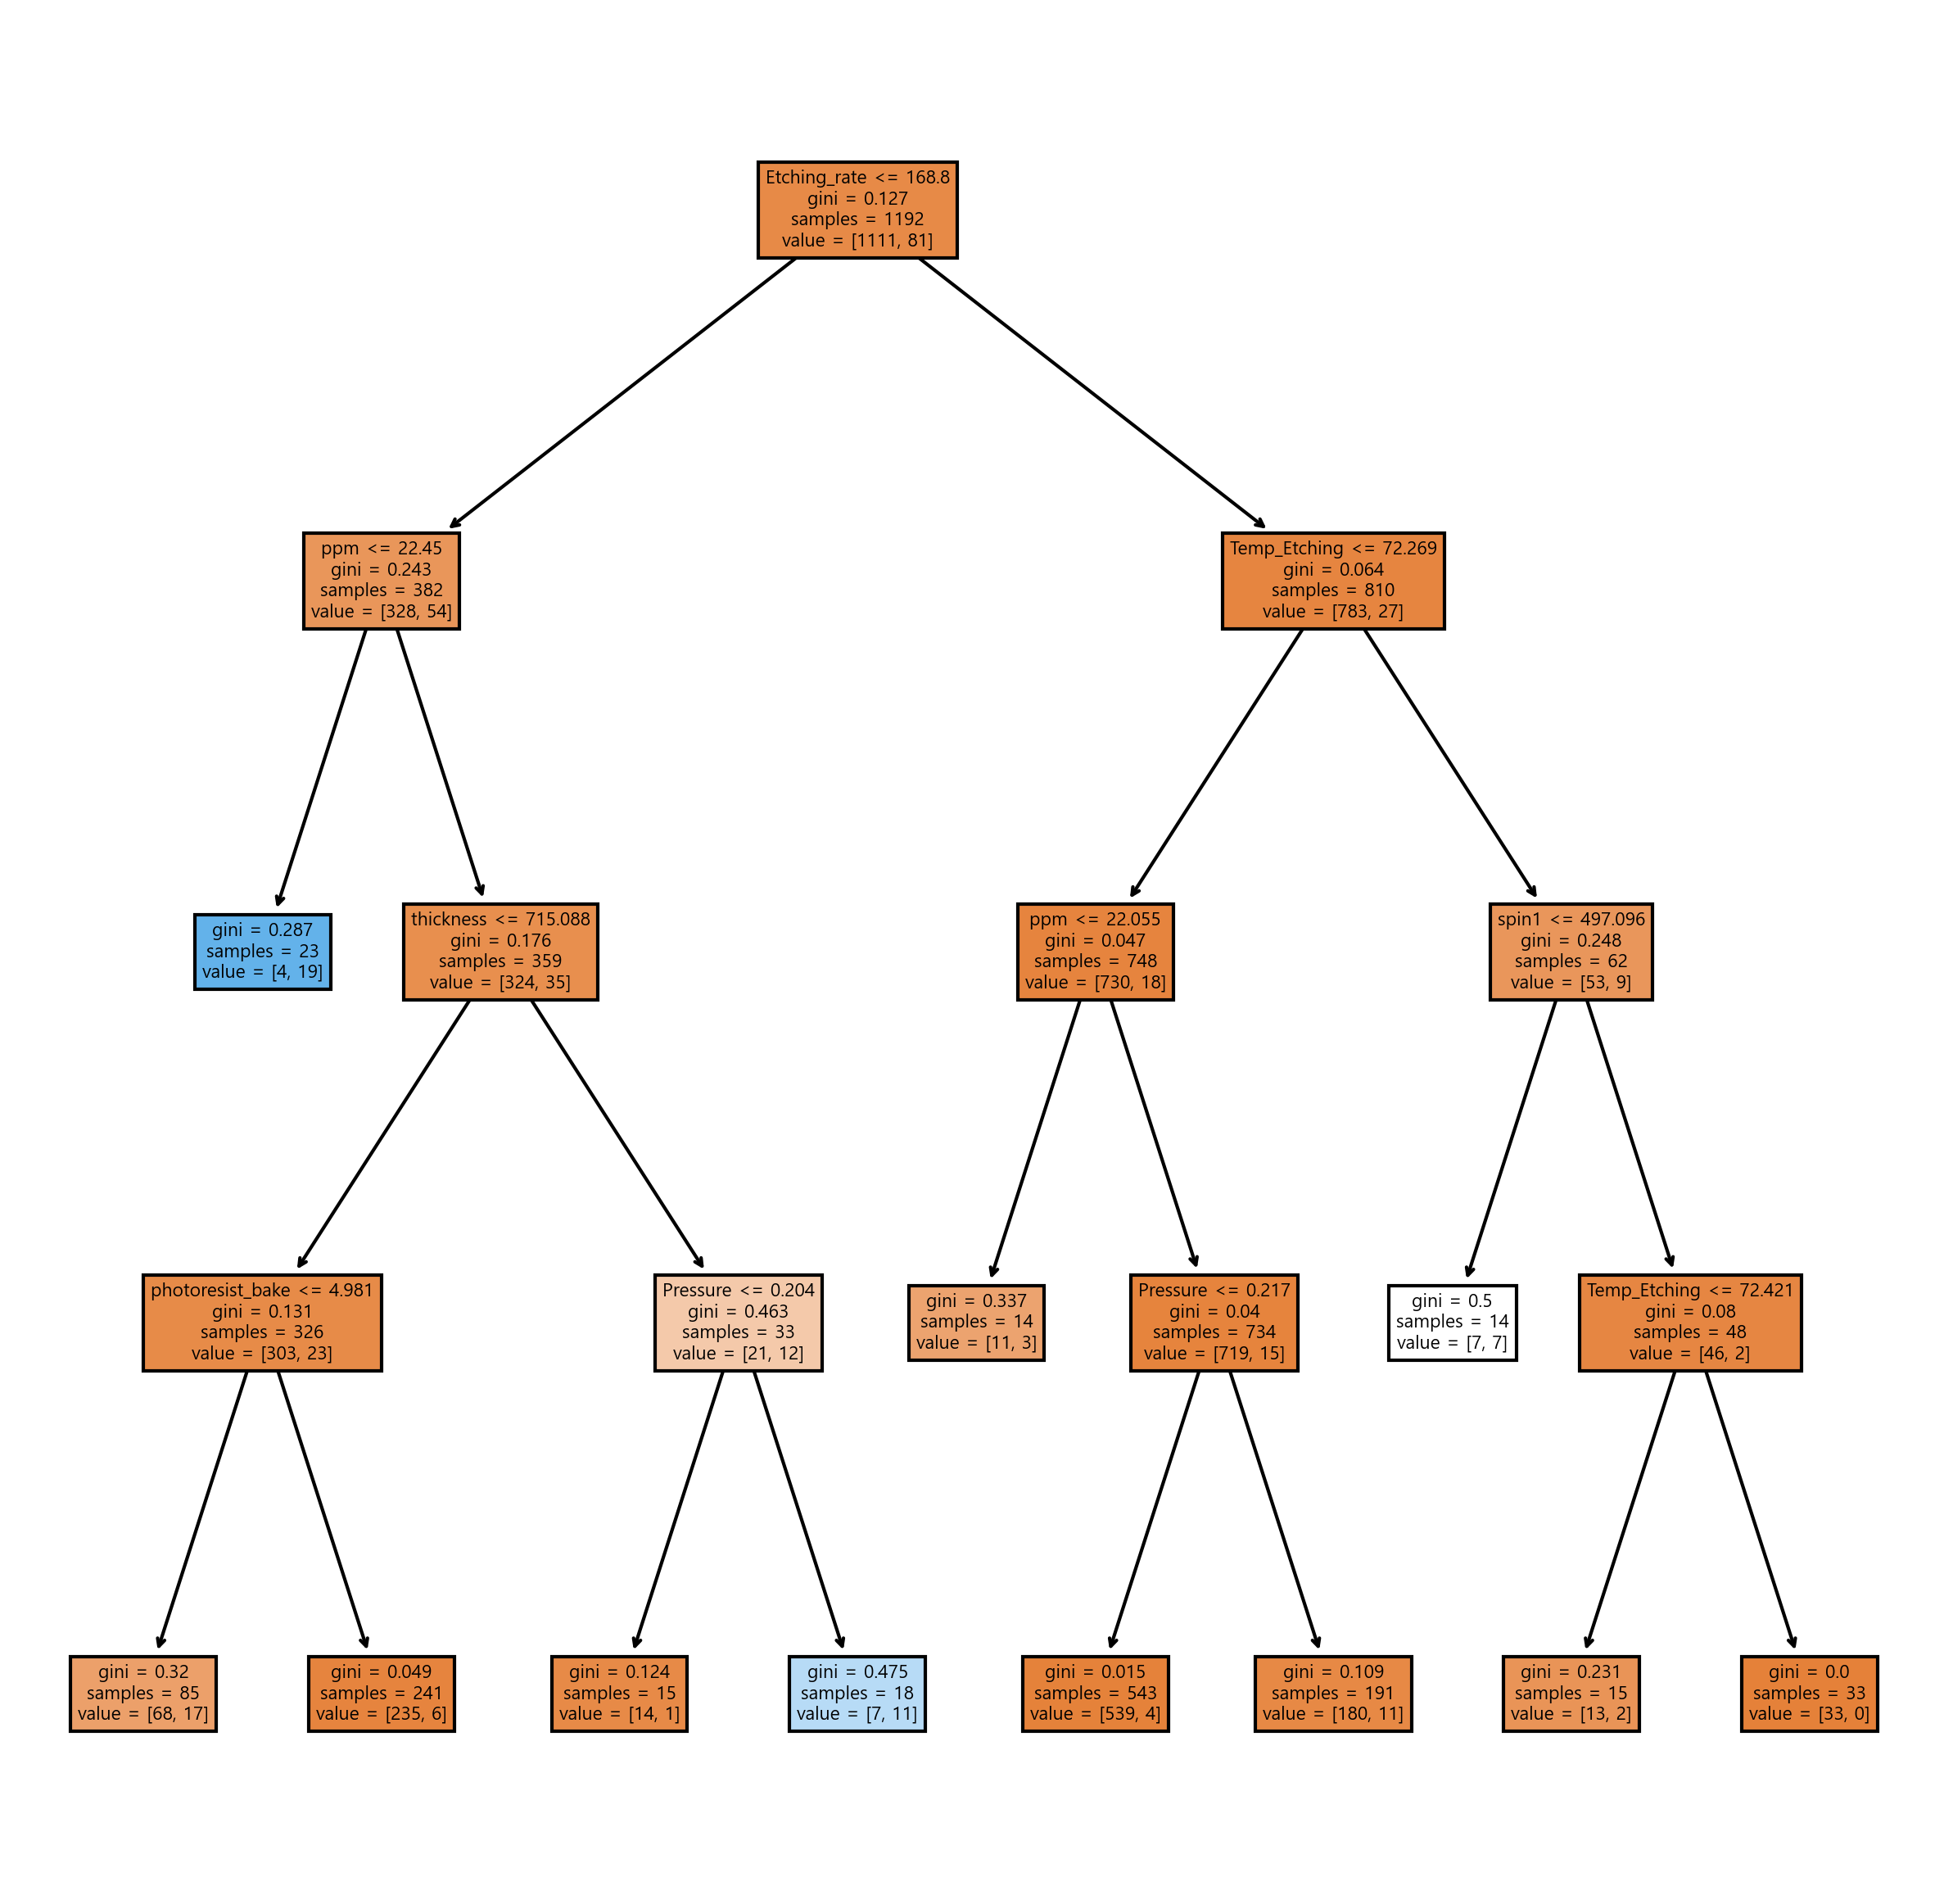

In [17]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(min_samples_leaf = 14, min_samples_split = 6, max_depth = 4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [18]:
y_pred = tree_final.predict(df_test_x)

print('Accuracy on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.948
Accuracy on test set : 0.943
Confusion matrix : 
[[472   4]
 [ 25  11]]
              precision    recall  f1-score   support

           0      0.950     0.992     0.970       476
           1      0.733     0.306     0.431        36

    accuracy                          0.943       512
   macro avg      0.842     0.649     0.701       512
weighted avg      0.934     0.943     0.932       512



In [19]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,ppm,0.468
26,Etching_rate,0.118
2,Pressure,0.109
3,thickness,0.101
6,spin1,0.089
9,photoresist_bake,0.075
15,Temp_Etching,0.040
0,Temp_OXid,0.000
22,input_Energy,0.000
20,Flux480s,0.000


Text(0, 0.5, '설명변수')

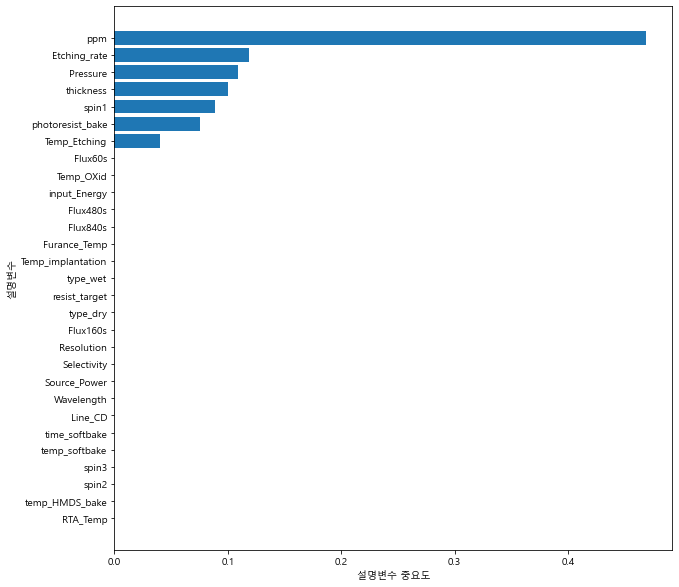

In [20]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# DT

In [21]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/데이터셋 초초안.CSV",encoding='euc-kr')
df

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,33333,174.44950
1700,1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,11133,172.29475
1701,1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,11222,174.68650
1702,1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,11311,174.82175


Flux90s','Oxid_time','N2_HMDS','pressure_HMDS','temp_HMDS','time_HMDS_bake','Energy_Exposure','Source_Power','temp_HMDS_bake'
'Flux160s','Flux60s','Flux480s
12개뻄

In [22]:
df.drop(['Unnamed: 0','Chamber','Flux90s','Oxid_time','N2_HMDS','pressure_HMDS','temp_HMDS','time_HMDS_bake','Energy_Exposure',
         'Source_Power','temp_HMDS_bake','Flux160s','Flux60s','Flux480s'] ,axis = 1, inplace = True)

In [29]:
df

,type,Temp_OXid,ppm,Pressure,thickness,resist_target,spin1,spin2,spin3,photoresist_bake,...,Resolution,Temp_Etching,Selectivity,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Etching_rate
0,dry,1214.307948,26.69,0.203,713.132,1.46994,502.391,4017.144,4903.611,5.020,...,505.388,72.651,1.030,6.000000e+17,30795.934,103.433,854.0,154,0,169.78300
1,dry,978.110792,30.86,0.217,714.295,0.86579,507.183,4072.913,4979.082,4.937,...,541.732,70.267,1.038,6.000000e+17,32135.618,105.552,895.0,156,0,171.94875
2,dry,1176.019149,31.07,0.218,710.114,0.90483,501.286,4084.939,5031.989,4.888,...,532.200,71.231,1.005,6.000000e+17,31057.895,102.598,898.0,152,0,167.25350
3,dry,933.442733,31.04,0.196,710.617,0.42197,503.396,4045.078,4969.316,4.933,...,537.729,71.295,1.025,6.000000e+17,32140.566,102.963,879.0,155,0,169.45425
4,wet,1140.598752,31.37,0.215,711.632,1.70139,501.423,4010.176,5092.407,5.050,...,522.143,72.983,1.038,6.000000e+17,31986.009,101.419,882.0,155,0,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,715.498,0.89644,504.429,4088.587,5110.734,5.114,...,468.930,71.550,1.015,6.000000e+17,32248.621,101.503,868.0,152,0,174.44950
1700,wet,1268.105427,45.07,0.215,707.179,1.02384,504.266,4085.330,5106.662,5.083,...,469.586,70.718,1.011,6.000000e+17,32241.426,101.061,867.0,152,0,172.29475
1701,wet,1279.160563,45.12,0.214,712.946,1.02634,503.401,4068.014,5085.017,5.098,...,476.399,71.295,1.015,6.000000e+17,32245.574,101.506,868.0,152,0,174.68650
1702,wet,1272.804948,45.34,0.213,711.987,0.56833,503.670,4073.408,5091.760,5.107,...,476.997,71.199,1.014,6.000000e+17,32259.412,101.360,868.0,152,0,174.82175


In [23]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [24]:
df_x_dummy = pd.get_dummies(df_x)

In [25]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.3, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 24)
train data Y size : (1192,)
test data X size : (512, 24)
test data Y size : (512,)


In [26]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.941


In [27]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.930
1,2,0.945,0.939
2,3,0.950,0.943
3,4,0.956,0.945
4,5,0.963,0.949
5,6,0.977,0.938
6,7,0.984,0.939
7,8,0.988,0.924
8,9,0.995,0.930
9,10,0.997,0.934


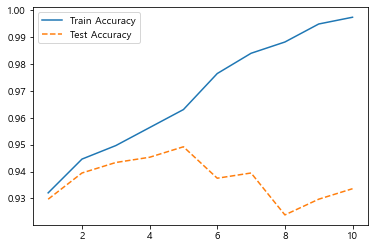

In [28]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [30]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 5
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.963,0.949
1,4,0.963,0.949
2,6,0.962,0.947
3,8,0.960,0.943
4,10,0.960,0.943
5,12,0.960,0.943
6,14,0.960,0.943
7,16,0.957,0.943
8,18,0.957,0.943
9,20,0.957,0.943


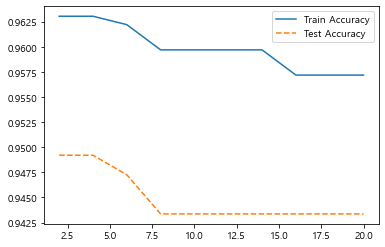

In [31]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [32]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 5, min_samples_split=4
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.961,0.945
1,4,0.956,0.941
2,6,0.951,0.939
3,8,0.951,0.945
4,10,0.951,0.943
5,12,0.949,0.943
6,14,0.948,0.943
7,16,0.947,0.941
8,18,0.945,0.939
9,20,0.945,0.939


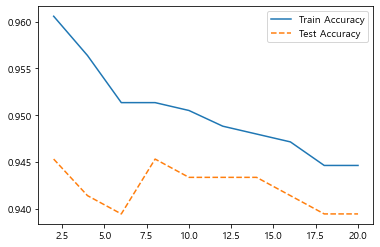

In [33]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

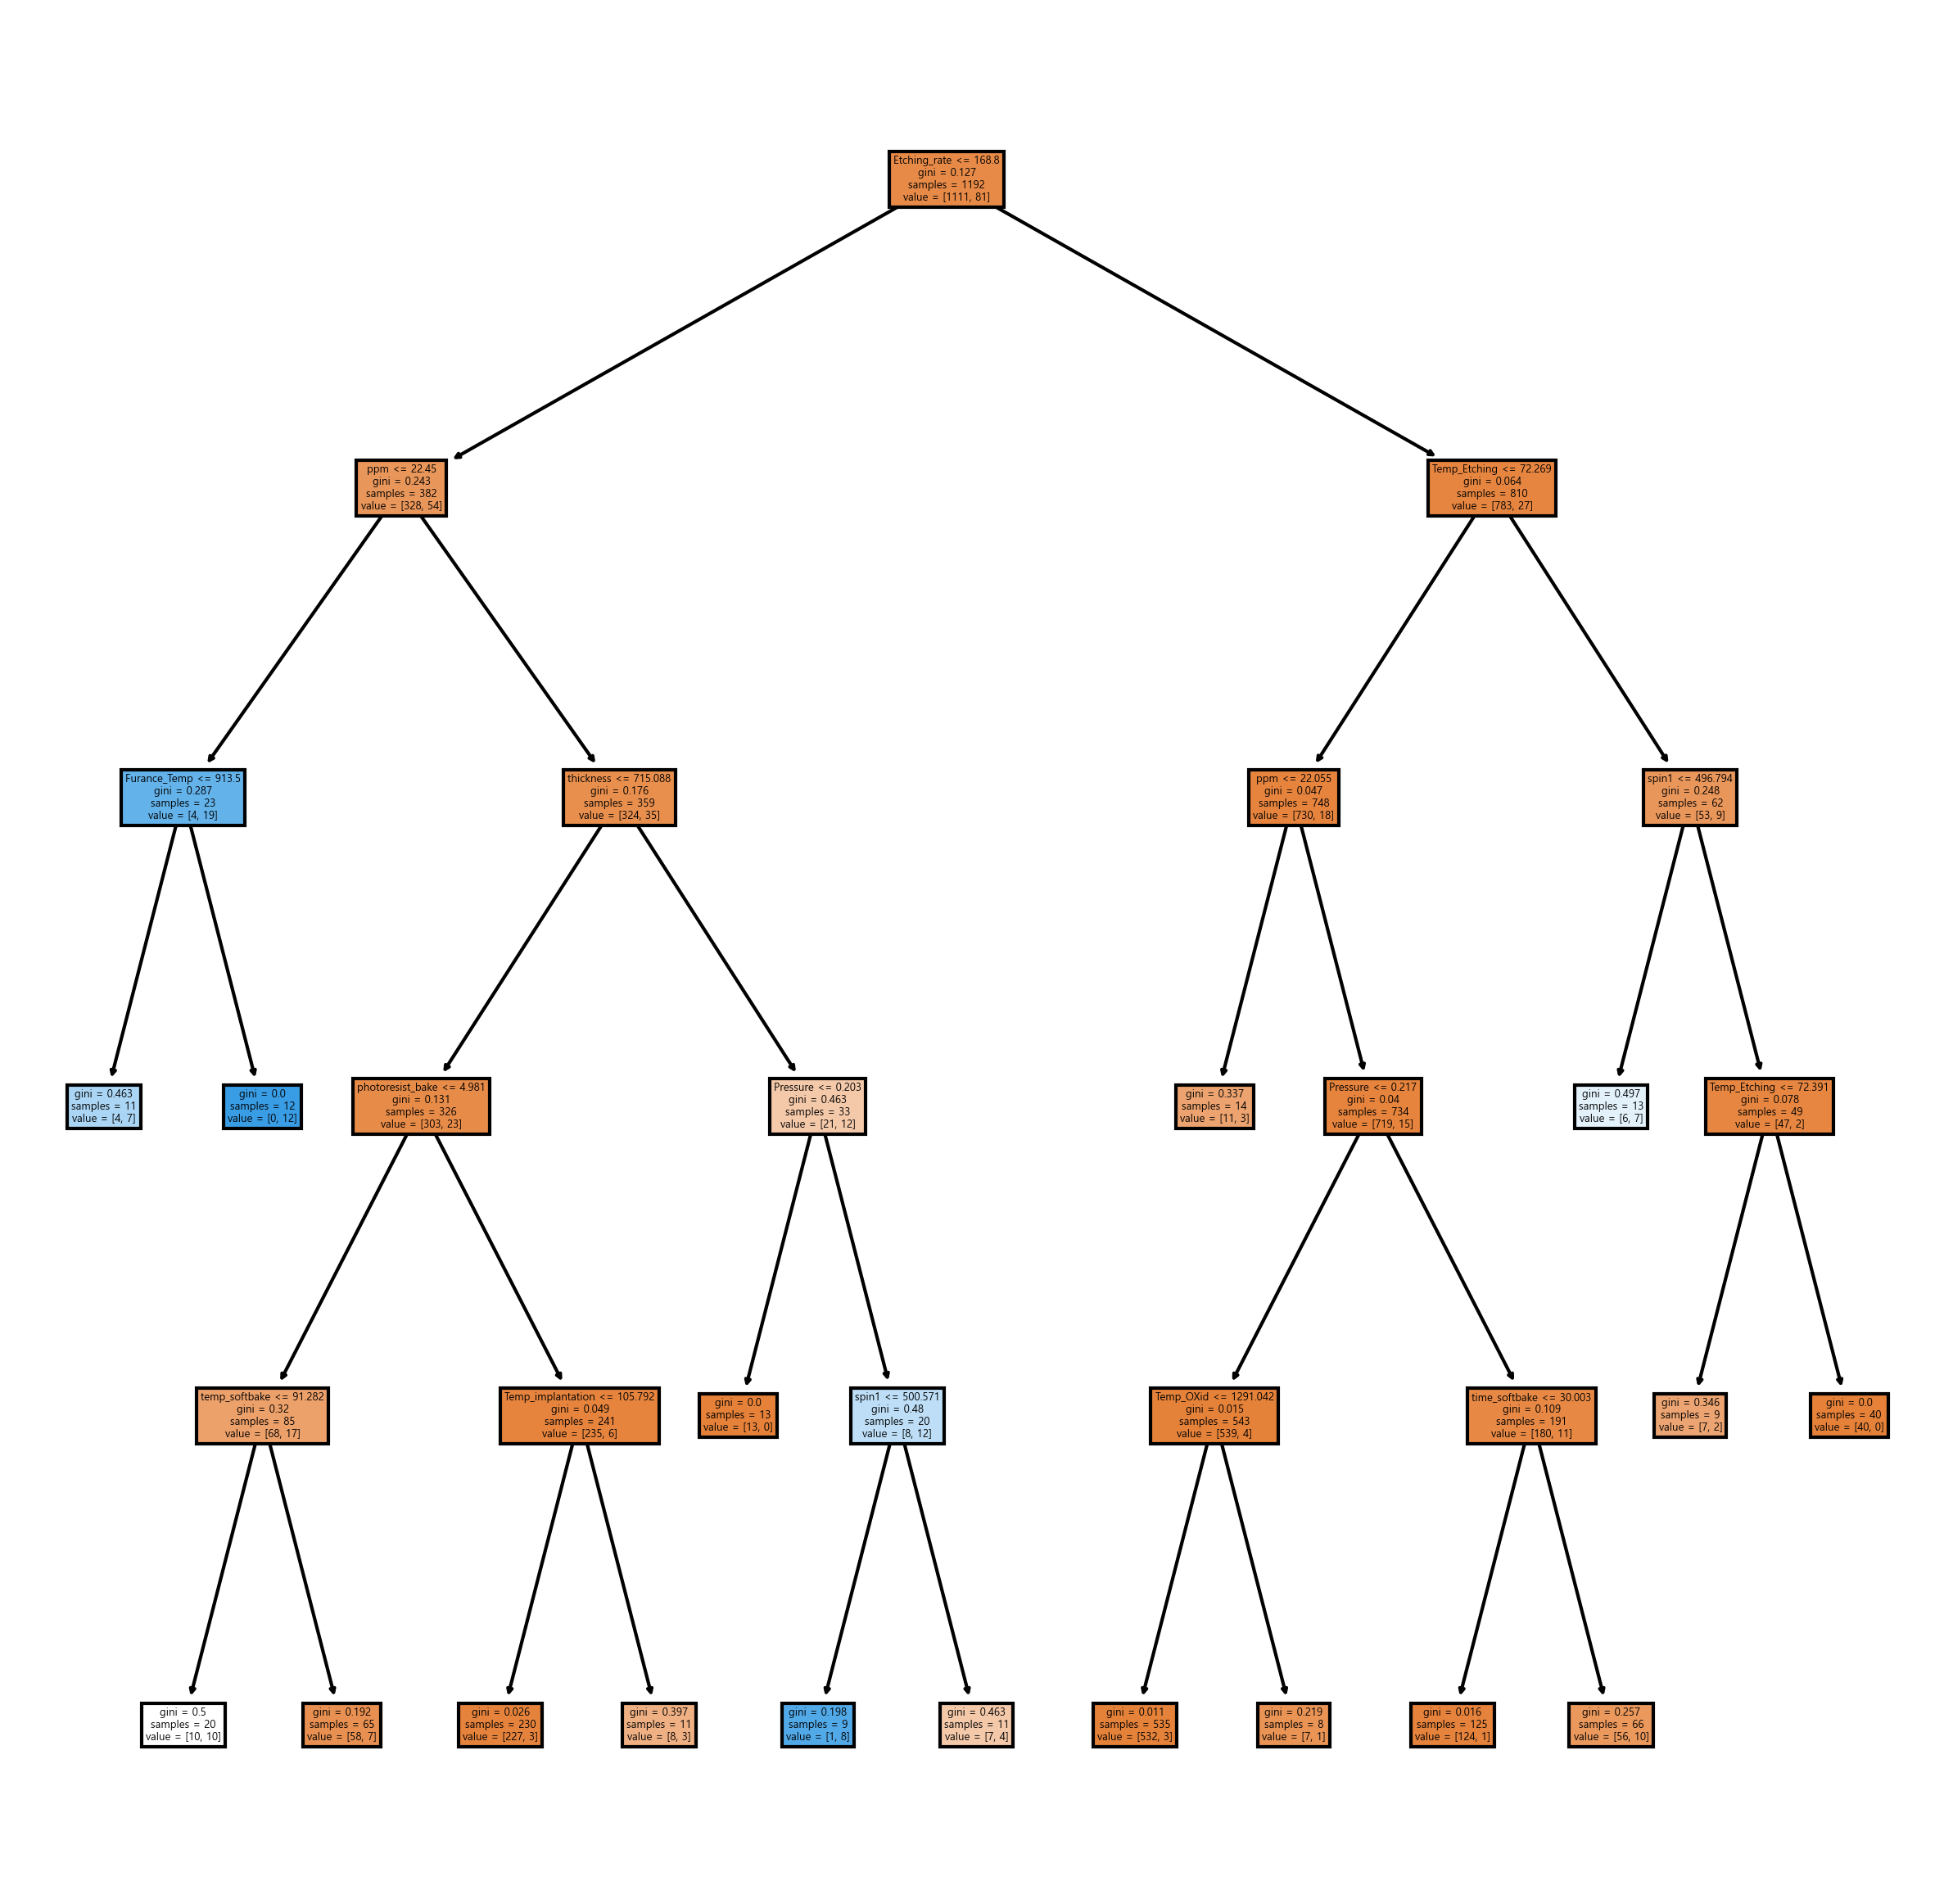

In [34]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 4, max_depth = 5, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [35]:
y_pred = tree_final.predict(df_test_x)

print('Accuracy on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.951
Accuracy on test set : 0.945
Confusion matrix : 
[[472   4]
 [ 24  12]]
              precision    recall  f1-score   support

           0      0.952     0.992     0.971       476
           1      0.750     0.333     0.462        36

    accuracy                          0.945       512
   macro avg      0.851     0.662     0.716       512
weighted avg      0.937     0.945     0.935       512



In [36]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,ppm,0.367
5,spin1,0.120
2,Pressure,0.098
21,Etching_rate,0.093
3,thickness,0.079
9,temp_softbake,0.072
8,photoresist_bake,0.059
14,Temp_Etching,0.037
10,time_softbake,0.027
19,Furance_Temp,0.023


Text(0, 0.5, '설명변수')

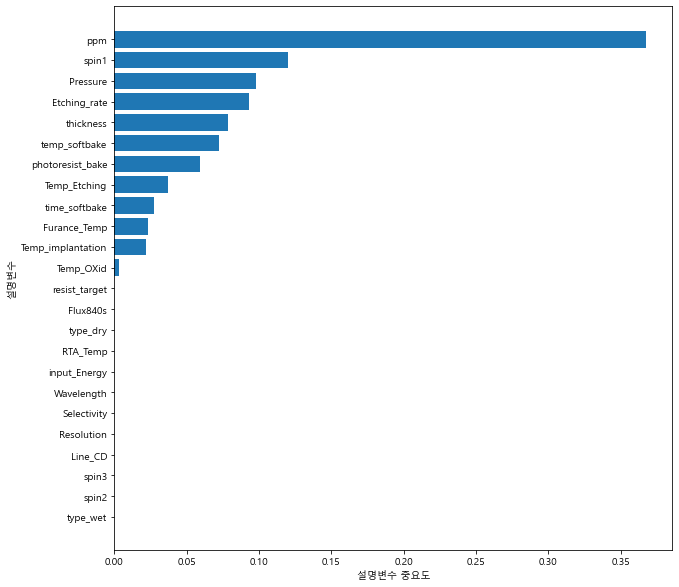

In [37]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# gb

In [38]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.998
Accuracy on test set : 0.967


In [39]:
train_accuracy = [] 
test_accuracy = []
# 학습률 변경에 따른 모델 성능
para_lr = [lr*0.1 for lr in range(1, 11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = v_learning_rate )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["Trainaccuracy"] = train_accuracy
df_accuracy_lr["Testaccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,Trainaccuracy,Testaccuracy
0,0.1,0.998,0.967
1,0.2,1.000,0.973
2,0.3,1.000,0.973
3,0.4,1.000,0.965
4,0.5,1.000,0.971
5,0.6,1.000,0.965
6,0.7,1.000,0.965
7,0.8,1.000,0.965
8,0.9,1.000,0.959
9,1.0,1.000,0.971


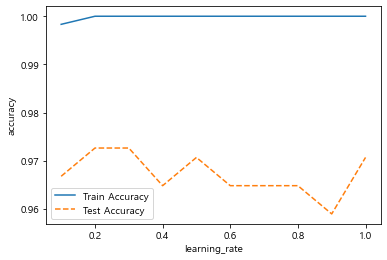

In [40]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

In [41]:
train_accuracy =[]
test_accuracy=[]
# 트리 수에 변경에 따른 모델 성능
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state = 1234,n_estimators =v_n_estimators, learning_rate = 0.3)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.979,0.959
1,20,0.992,0.961
2,30,0.997,0.969
3,40,0.999,0.969
4,50,1.000,0.969
5,60,1.000,0.971
6,70,1.000,0.973
7,80,1.000,0.973
8,90,1.000,0.973
9,100,1.000,0.973


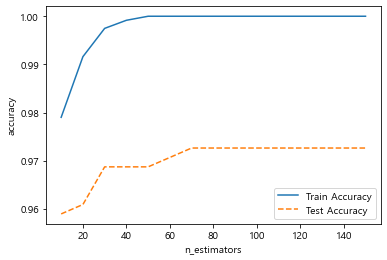

In [42]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [43]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 80,learning_rate = 0.3)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.956,0.941
1,2,0.998,0.963
2,3,1.000,0.973
3,4,1.000,0.967
4,5,1.000,0.977
5,6,1.000,0.971
6,7,1.000,0.971
7,8,1.000,0.975
8,9,1.000,0.947
9,10,1.000,0.947


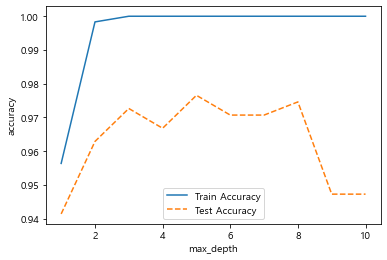

In [44]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [45]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = 5, n_estimators = 80,learning_rate = 0.3
                                 , min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,1.0,0.973
1,20,1.0,0.975
2,30,1.0,0.967
3,40,1.0,0.971
4,50,1.0,0.971
5,60,1.0,0.969
6,70,1.0,0.971
7,80,1.0,0.973
8,90,1.0,0.973
9,100,1.0,0.971


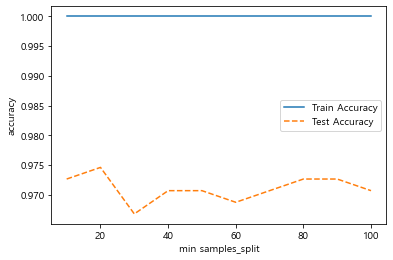

In [46]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples_split')
plt.legend()

In [47]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]
# 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, max_depth = 5, min_samples_split=20,n_estimators = 80
                                , learning_rate = 0.3,min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,1.0,0.977
1,20,1.0,0.977
2,30,1.0,0.975
3,40,1.0,0.971
4,50,1.0,0.979
5,60,1.0,0.973
6,70,1.0,0.975
7,80,1.0,0.973
8,90,1.0,0.977
9,100,1.0,0.967


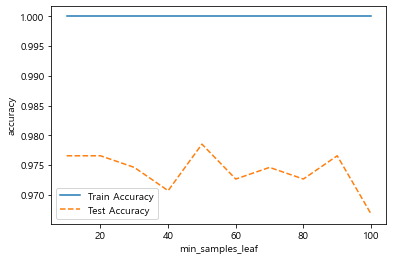

In [48]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [49]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 50, min_samples_split = 20, max_depth = 5, random_state=1234,
                               learning_rate = 0.3, n_estimators =80)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 1.000
Accuracy on test set : 0.979
Confusion matrix : 
[[472   4]
 [  7  29]]
              precision    recall  f1-score   support

           0      0.985     0.992     0.988       476
           1      0.879     0.806     0.841        36

    accuracy                          0.979       512
   macro avg      0.932     0.899     0.915       512
weighted avg      0.978     0.979     0.978       512



In [50]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,Temp_OXid,0.266
21,Etching_rate,0.233
3,thickness,0.104
2,Pressure,0.042
9,temp_softbake,0.038
8,photoresist_bake,0.038
17,input_Energy,0.035
18,Temp_implantation,0.031
14,Temp_Etching,0.027
5,spin1,0.026


Text(0, 0.5, '설명변수')

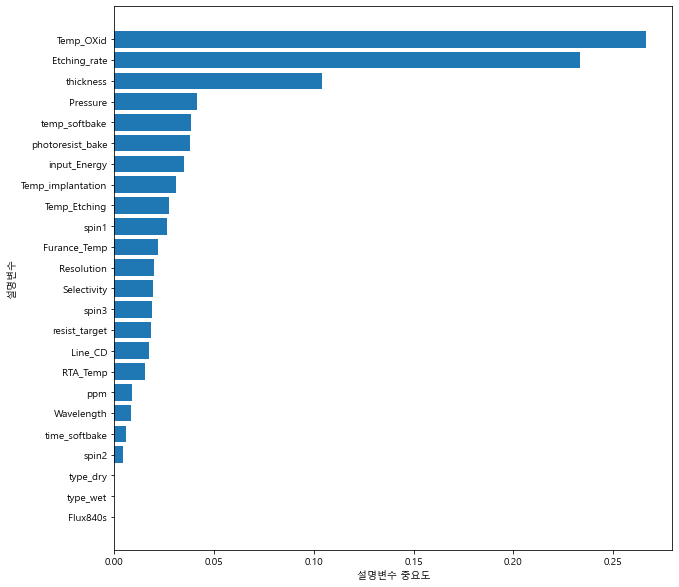

In [51]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# RT

In [52]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.963


In [53]:
train_accuracy =[]
test_accuracy=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.997,0.951
1,20,0.999,0.967
2,30,1.000,0.965
3,40,1.000,0.967
4,50,1.000,0.965
5,60,1.000,0.963
6,70,1.000,0.963
7,80,1.000,0.963
8,90,1.000,0.963
9,100,1.000,0.963


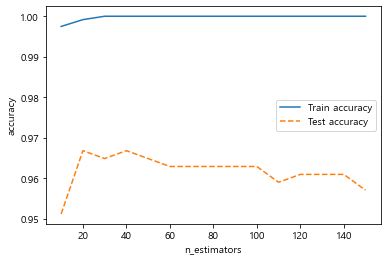

In [54]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [ ]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth, n_estimators = 90)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)